In [3]:
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [4]:
path="//home//shahabas//Desktop//"
file_name="LP Data QC Sample .xlsx"
file=os.path.join(path,file_name)

In [5]:
data=pd.read_excel(file)

In [6]:
data.head()

,Title,Region,Firm Type,Country,Check date,Fund Commitments,Address,Communication Details,Fundamentals,AUM,...,Strategy Preferences,Geographic Preferences,Industry Preferences,Investment Preferences,Written Strategy & Preferences,Future Searches & Mandates,Contacts,Investor News,What were the errors? Have problems been fixed?,Time to Complete
0,Firm 1,APAC,Wealth Manager,Singapore,11/28/2022,Correct,Inaccurate,Inaccurate & Incomplete,NaN,Correct,...,Correct,Correct,Correct,Correct,Correct,Correct,Correct,Correct,"Address, Communication Details: the firm moved...",30
1,Firm 10,AMRS,Family Office - Single,Canada,2022-08-11 00:00:00,Correct,Correct,Correct,Correct,Correct,...,Correct,Correct,Correct,Correct,Inaccurate,Correct,Correct,Correct,Don't believe the web researcher could find a ...,25
2,Firm 100,AMRS,Insurance Company,US,2022-11-11 00:00:00,Incomplete,Correct,Correct,Correct,Incomplete,...,Correct,Correct,Correct,Correct,Incomplete,Correct,Correct,Correct,Missing 2021 FS and 2022 Quarterly Statements,50
3,Firm 1000,AMRS,Foundation,US,2022-10-10 00:00:00,Correct,Correct,Correct,Correct,Correct,...,Correct,Correct,Correct,Correct,Correct,Correct,Correct,Correct,Current allocations are not all complete and u...,200
4,Firm 1001,AMRS,Insurance Company,Canada,2022-10-10 00:00:00,NaN,Correct,Correct,Correct,Correct,...,Correct,Correct,Correct,Correct,Inaccurate,Correct,Correct,Incomplete,"need to double check Israel preference, curren...",60


In [7]:
columns=['Region','Firm Type','Country','Fund Commitments','Address','Communication Details','Fundamentals',
                                 'AUM', 'Portfolio Composition', 'Investment Status',
       'Current Allocation', 'Target Allocation', 'Strategy Preferences',
       'Geographic Preferences', 'Industry Preferences',
       'Investment Preferences', 'Written Strategy & Preferences',
       'Future Searches & Mandates', 'Contacts', 'Investor News','Time to Complete']

In [9]:
le_list = []
for i in columns:
    if i in data.columns:
        
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
        le_list.append(le)
        

In [10]:
corr_matrix = data.corr()

/tmp/ipykernel_6901/962194556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [51]:
print(corr_matrix)

                                       Time to Complete  Region_AMRS  \
Time to Complete                               1.000000    -0.119954   
Region_AMRS                                   -0.119954     1.000000   
Region_APAC                                    0.114837    -0.873278   
Region_EMEA                                    0.020576    -0.334154   
Firm Type_Asset Manager                       -0.030176    -0.158870   
...                                                 ...          ...   
Investor News_Correct                          0.000095     0.297603   
Investor News_Inaccurate                       0.067282    -0.032771   
Investor News_Inaccurate & Incomplete         -0.052512     0.044585   
Investor News_Incomplete                       0.230182    -0.057028   
Investor News_correct                         -0.029358     0.043876   

                                       Region_APAC  Region_EMEA  \
Time to Complete                          0.114837     0.020576   
R

<AxesSubplot: >

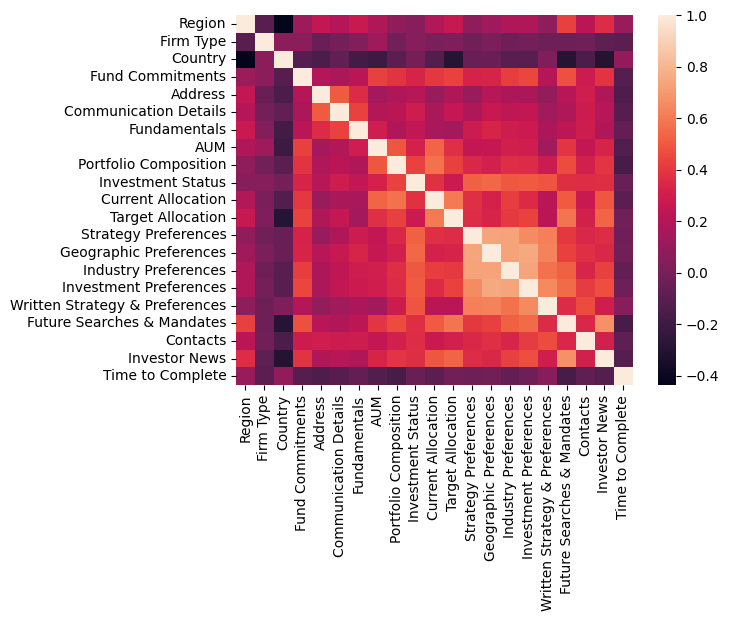

In [12]:
sns.heatmap(corr_matrix, annot=False)# to view the numbers in map please put True in annot